# Introduction
* goal: Predict the energy generated from a photovoltaic installation
* We will predict the energy generated from photovolatic installation using weather dataset 

# Setup

In [48]:
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost
import xgboost as xgb 
import lightgbm as ltb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 


In [49]:
df = pd.read_csv("pv.csv")
df

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,USAFA,20180928,1530,38.95,-104.83,1947,2.018090e+11,9,15,Fall,11.66992,43.22510,9.79611,14,10.0,802.3,722
21041,USAFA,20180929,1300,38.95,-104.83,1947,2.018090e+11,9,13,Fall,18.22510,28.98247,10.88992,13,10.0,799.2,722
21042,USAFA,20180929,1400,38.95,-104.83,1947,2.018090e+11,9,14,Fall,15.52124,33.49167,8.24479,10,10.0,798.4,722
21043,USAFA,20180929,1500,38.95,-104.83,1947,2.018090e+11,9,15,Fall,6.63452,51.62163,12.47328,10,10.0,797.8,722


* Latitude: the angular distance of a place north or south of the earth's equator, The lowest latitudes get the most energy from the Sun. The highest latitudes get the least (the best between 30 degrees and 45 degrees).
* Longitude is a geographic coordinate that specifies the east–west position of a point on the surface of the Earth. 
* altitude: the height of an object or point in relation to sea level or ground level. solar panels are more efficient at high altitudes.
* Humidity readily affects the efficiency of the solar cells and creates a minimal layer of water on its surface. It also decreases the efficiency by 10-20% of the total power output produced --> humidity that it brings down the utilization of solar energy approximately to 55-60% from just 70% approximately of utilized energy.
*  As the temperature of the solar panel increases, its output current increases
* Visibility: is the measure of the distance at which an object or light can be clearly discerned. 
* The height of the lowest layer of clouds, when the sky is broken or overcast.Thick low-level layered clouds may reduce solar radiation intensity by 80–90%.


In [50]:
df.shape

(21045, 17)

In [51]:
df['Location'].nunique() #check unique values in location to see how can we transform it.

12

In [52]:
df.set_index("Date", inplace=True) #Set date column as index

In [53]:
df.rename(columns = {'PolyPwr':'generated power'}, inplace = True) #Change target column name to Generated power

In [54]:
df.info() #get information about features such as type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21045 entries, 20171203 to 20181001
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         21045 non-null  object 
 1   Time             21045 non-null  int64  
 2   Latitude         21045 non-null  float64
 3   Longitude        21045 non-null  float64
 4   Altitude         21045 non-null  int64  
 5   YRMODAHRMI       21045 non-null  float64
 6   Month            21045 non-null  int64  
 7   Hour             21045 non-null  int64  
 8   Season           21045 non-null  object 
 9   Humidity         21045 non-null  float64
 10  AmbientTemp      21045 non-null  float64
 11  generated power  21045 non-null  float64
 12  Wind.Speed       21045 non-null  int64  
 13  Visibility       21045 non-null  float64
 14  Pressure         21045 non-null  float64
 15  Cloud.Ceiling    21045 non-null  int64  
dtypes: float64(8), int64(6), object(2)
memory usage:

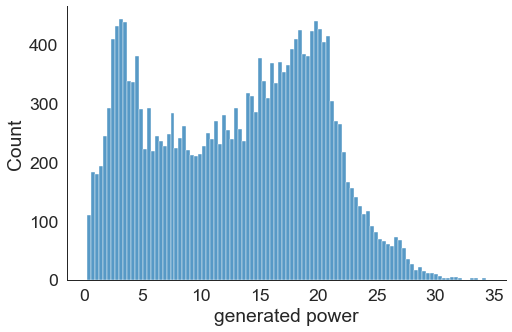

In [55]:
#plot the target value
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="generated power", kind="hist", bins = 100, aspect = 1.5)

* The histogram does not show asignificant skew, so it is normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis.

In [56]:
# check null values
df.isnull().sum()

Location           0
Time               0
Latitude           0
Longitude          0
Altitude           0
YRMODAHRMI         0
Month              0
Hour               0
Season             0
Humidity           0
AmbientTemp        0
generated power    0
Wind.Speed         0
Visibility         0
Pressure           0
Cloud.Ceiling      0
dtype: int64

* there is not null values

<AxesSubplot:>

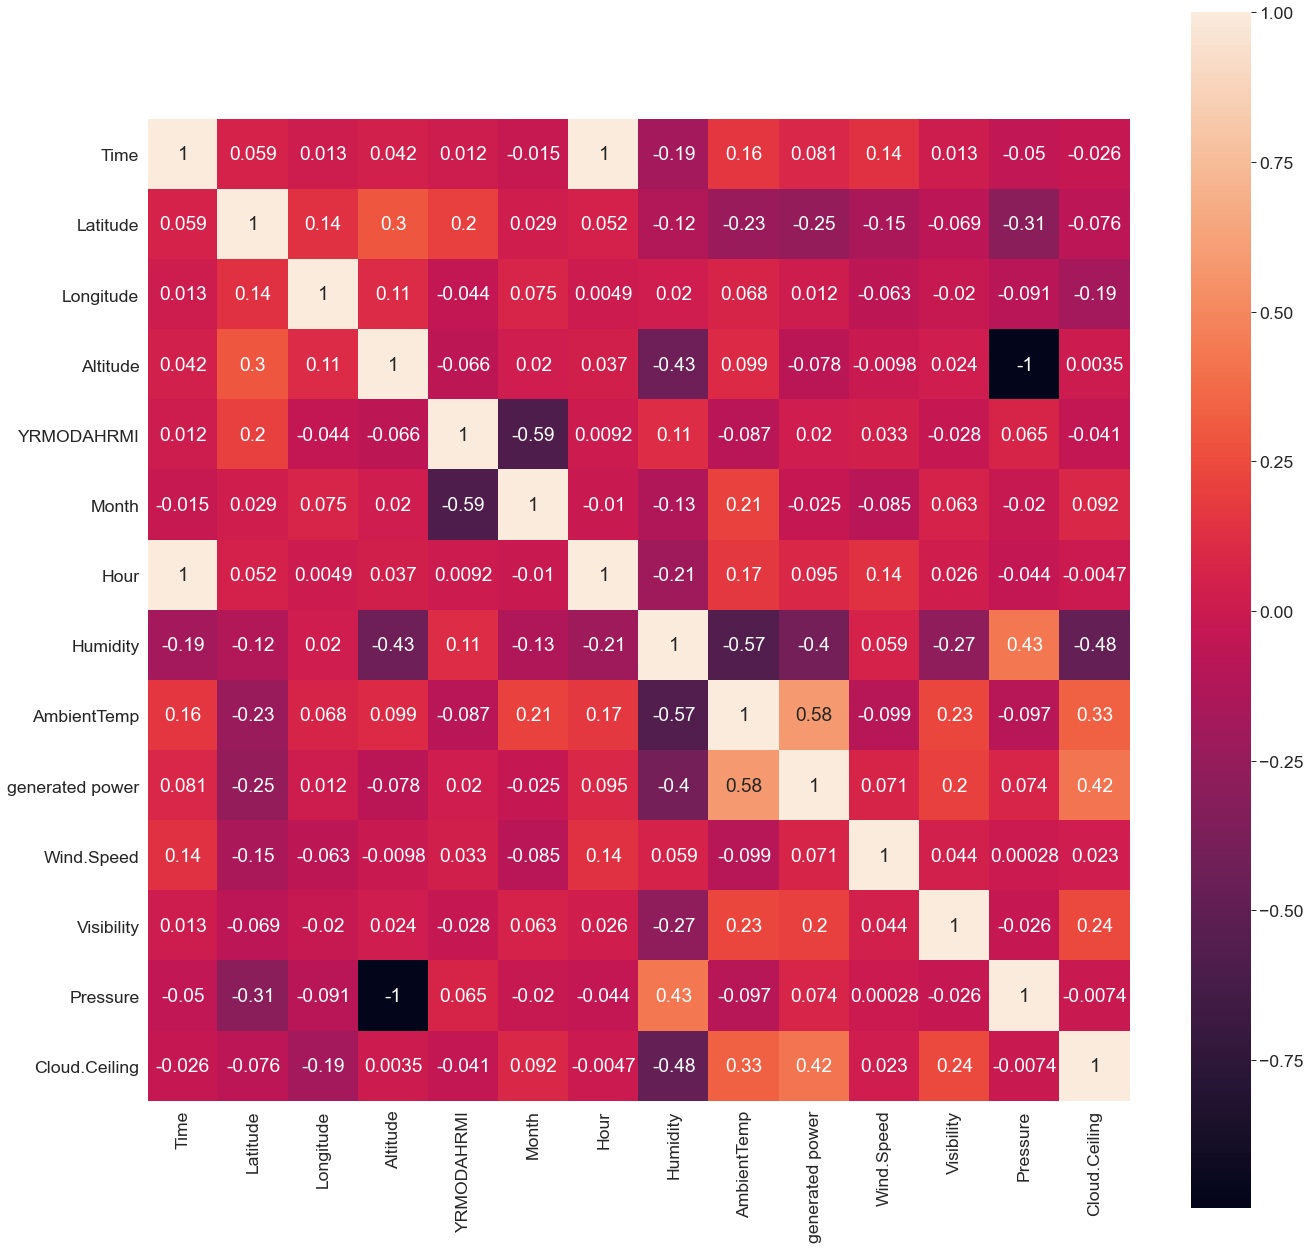

In [57]:
#check the correlation between variables 
corr = df.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, square=True)


# Preprocessing

In [58]:
labelencoder = LabelEncoder()

df['Location'] = labelencoder.fit_transform(df['Location']) #we do this to change categorial features to numerical features.

In [59]:
data = pd.get_dummies(df, columns = ['Season'])  #another way to change the categorial feature 'season' to numerical feature.

In [60]:
data['Location'].value_counts() #check if get dummies work or not so now instread of having location names every city have its ID as a number.

10    2746
9     2640
11    2573
2     2384
7     2204
3     1779
6     1517
1     1487
0     1113
4      941
8      881
5      780
Name: Location, dtype: int64

* now we move to cyclic feature encoding, the issue here is that the model would consider the difference between 23:58 and 00:02 as a 1336 gap whereas they are only 4 minutes apart, so we had to encode them using cos and sin function
* We will run the cosine function after normalizing x between 0 to 2π, then we will use cos function o distinguish two times with identical cosine values (2 times or months have same values) 

In [61]:
# we define the period when the system generated better result from 10am to 15pm

min_hour_of_interest = 10
max_hour_of_interest = 15

In [62]:
#create cyclic features using month and hour data and do the normalization at the same time 
data['delta_hr']= data.Hour - min_hour_of_interest

In [63]:
data['sine_month']= np.sin((data.Month - 1)*np.pi/11)
data['cos_month']= np.cos((data.Month - 1)*np.pi/11)
data['sine_hour']= np.sin((data.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
data['cos_hour']= np.cos((data.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest))) 

<AxesSubplot:>

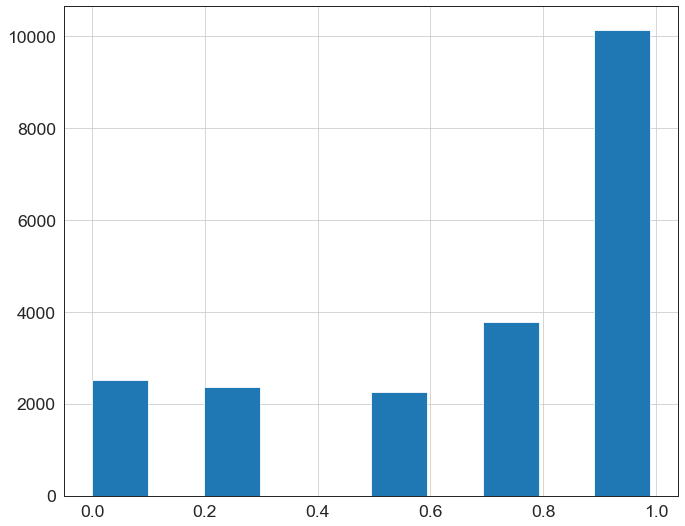

In [64]:
data.sine_month.hist() #features are normalized based on the hist since they are between 0 and 1 

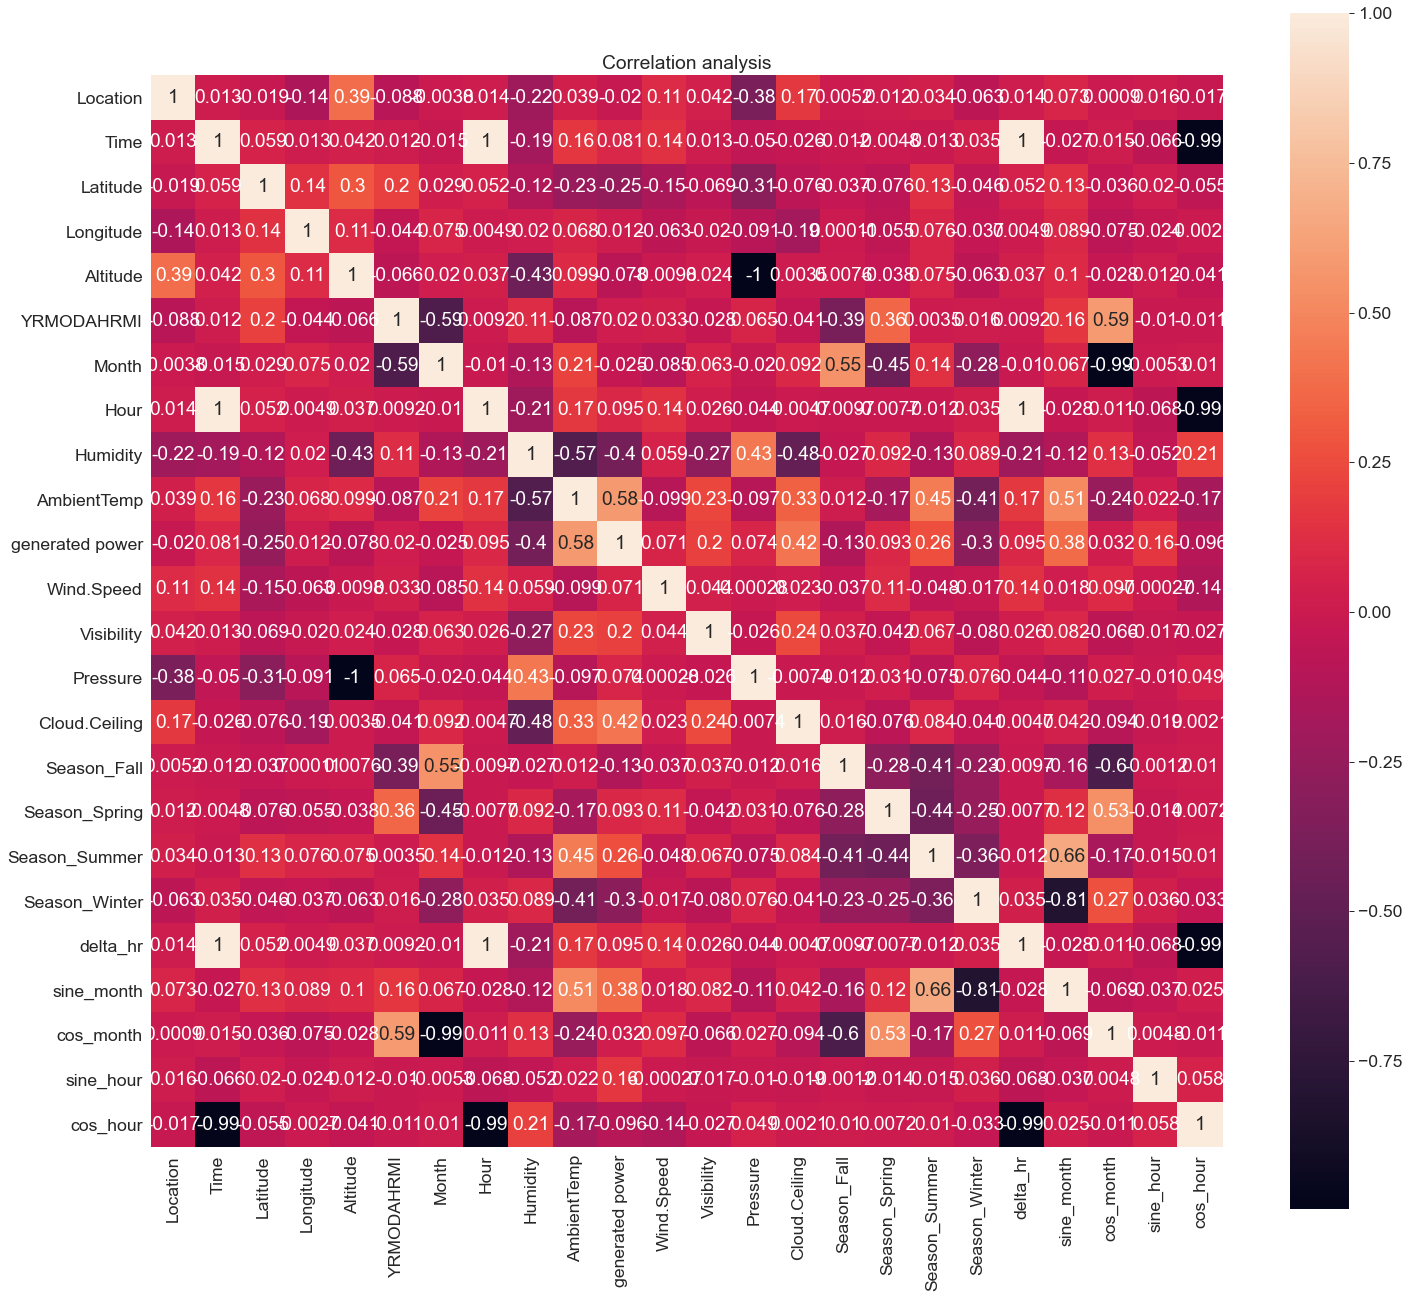

In [65]:
corr = data.corr()
plt.figure(figsize=(24,24))
sns.heatmap(corr, annot=True, square=True)
plt.title('Correlation analysis');

In [66]:
#drop useless features based on their correlation with the target
data.drop(labels='Altitude', axis=1, inplace=True)

In [67]:
data.drop(labels='YRMODAHRMI', axis=1, inplace=True)

In [68]:
data.drop(labels='Month', axis=1, inplace=True)
data.drop(labels='Hour', axis=1, inplace=True)

In [69]:
data.drop(labels='Time', axis=1, inplace=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21045 entries, 20171203 to 20181001
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         21045 non-null  int32  
 1   Latitude         21045 non-null  float64
 2   Longitude        21045 non-null  float64
 3   Humidity         21045 non-null  float64
 4   AmbientTemp      21045 non-null  float64
 5   generated power  21045 non-null  float64
 6   Wind.Speed       21045 non-null  int64  
 7   Visibility       21045 non-null  float64
 8   Pressure         21045 non-null  float64
 9   Cloud.Ceiling    21045 non-null  int64  
 10  Season_Fall      21045 non-null  uint8  
 11  Season_Spring    21045 non-null  uint8  
 12  Season_Summer    21045 non-null  uint8  
 13  Season_Winter    21045 non-null  uint8  
 14  delta_hr         21045 non-null  int64  
 15  sine_month       21045 non-null  float64
 16  cos_month        21045 non-null  float64
 17  si

* we are going to normalize the data to set all the values between 0 and 1 because they dont have the same measures and for better results
* we will split the data into features and target, we are going to normalize only this features below because the rest of features like sin hour and month are already normalized and location and season are encoded so we dont do the normalizat. to this values

In [71]:
feat = data[["Latitude",
  "Longitude",
  "Humidity",
  "AmbientTemp",
  "Wind.Speed",
  "Visibility",
  "Pressure",
  "Cloud.Ceiling",
  "delta_hr"]]

In [72]:
feat

,Latitude,Longitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,delta_hr
Date,,,,,,,,,
20171203,47.11,-122.57,81.71997,12.86919,5,10.0,1010.6,722,1
20171203,47.11,-122.57,96.64917,9.66415,0,10.0,1011.3,23,3
20171203,47.11,-122.57,93.61572,15.44983,5,10.0,1011.6,32,3
20171204,47.11,-122.57,77.21558,10.36659,5,2.0,1024.4,6,2
20171204,47.11,-122.57,54.80347,16.85471,3,3.0,1023.7,9,4
...,...,...,...,...,...,...,...,...,...
20180928,38.95,-104.83,11.66992,43.22510,14,10.0,802.3,722,5
20180929,38.95,-104.83,18.22510,28.98247,13,10.0,799.2,722,3
20180929,38.95,-104.83,15.52124,33.49167,10,10.0,798.4,722,4


In [73]:
#apply the normalization for the features
scaler = MinMaxScaler()
scaled= pd.DataFrame(scaler.fit_transform(feat))
scaled.columns = feat.columns
scaled.index = feat.index
scaled.head()

,Latitude,Longitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,delta_hr
Date,,,,,,,,,
20171203,0.984604,0.443731,0.817299,0.383235,0.102041,1.0,0.923729,1.000000,0.2
20171203,0.984604,0.443731,0.966610,0.345845,0.000000,1.0,0.926554,0.031856,0.6
20171203,0.984604,0.443731,0.936272,0.413340,0.102041,1.0,0.927764,0.044321,0.6
20171204,0.984604,0.443731,0.772250,0.354040,0.102041,0.2,0.979419,0.008310,0.4
20171204,0.984604,0.443731,0.548102,0.429730,0.061224,0.3,0.976594,0.012465,0.8


In [74]:
data['generated power']

Date
20171203     2.42769
20171203     2.46273
20171203     4.46836
20171204     1.65364
20171204     6.57939
              ...   
20180928     9.79611
20180929    10.88992
20180929     8.24479
20180929    12.47328
20181001     6.39732
Name: generated power, Length: 21045, dtype: float64

In [75]:
#apply the normalization for the target value
scaler_target = MinMaxScaler()
scaler_target1 = scaler_target.fit_transform(data['generated power'].values.reshape(-1,1))

In [76]:
target= pd.DataFrame(scaler_target1, columns = ['generated power'])
target.index = feat.index

In [77]:
#Define non normalized features
feat1 = data[["Location",
  "Season_Fall",
  "Season_Spring",
  "Season_Summer",
  "Season_Winter",
  "sine_month",
  "cos_month",
  "sine_hour",
  "cos_hour"]]

In [78]:
# merge the data
result = pd.concat([scaled, feat1,target], axis=1, join='inner')
result.head(5)

,Latitude,Longitude,Humidity,AmbientTemp,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,delta_hr,Location,Season_Fall,Season_Spring,Season_Summer,Season_Winter,sine_month,cos_month,sine_hour,cos_hour,generated power
Date,,,,,,,,,,,,,,,,,,,
20171203,0.984604,0.443731,0.817299,0.383235,0.102041,1.0,0.923729,1.000000,0.2,0,0,0,0,1,5.665539e-16,-1.0,0.587785,0.809017,0.063782
20171203,0.984604,0.443731,0.966610,0.345845,0.000000,1.0,0.926554,0.031856,0.6,0,0,0,0,1,5.665539e-16,-1.0,0.951057,-0.309017,0.064812
20171203,0.984604,0.443731,0.936272,0.413340,0.102041,1.0,0.927764,0.044321,0.6,0,0,0,0,1,5.665539e-16,-1.0,0.951057,-0.309017,0.123753
20171204,0.984604,0.443731,0.772250,0.354040,0.102041,0.2,0.979419,0.008310,0.4,0,0,0,0,1,5.665539e-16,-1.0,0.951057,0.309017,0.041035
20171204,0.984604,0.443731,0.548102,0.429730,0.061224,0.3,0.976594,0.012465,0.8,0,0,0,0,1,5.665539e-16,-1.0,0.587785,-0.809017,0.185792


# Model

In [79]:
#define X: features and y: the target
X= result.drop(labels ='generated power',axis = 1).values
y= result['generated power']

In [80]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# XGBOOST

In [81]:
#our first model XGBOOSTregressor
xgb = xgboost.XGBRegressor(n_estimators=1000, random_state=42, learning_rate=0.05, n_jobs=4)
xgb.fit(x_train, y_train);

In [82]:
# n_estimators:times to go through the modeling cycle described above. 
# lr: the step size at each iteration while moving toward a minimum of a loss function.
# n_jobs equal to the number of cores on your machine.(for large dataset)

In [83]:
predictions = xgb.predict(x_test)
print(mean_squared_error(y_test, predictions))

0.014798708055242126


In [84]:
valid = pd.DataFrame(data = {'generated power': np.array(y_test).flatten(), 'generated power predicted': predictions.flatten()})
valid.head(10) 

,generated power,generated power predicted
0,0.516797,0.321606
1,0.456642,0.485279
2,0.327662,0.189962
3,0.671198,0.626596
4,0.658182,0.631700
5,0.252663,0.475943
6,0.463640,0.499858
7,0.580038,0.427742
8,0.464742,0.487624
9,0.339081,0.159300


# LGBM

In [ ]:
lgbm = ltb.LGBMRegressor(max_depth=6, random_state=314, metric='None', n_jobs=4, n_estimators=2000,learning_rate=0.005)

lgbm.fit(x_train,y_train)

In [86]:
# max depth: limit the tree depth explicitly and to avoid over fitting

In [87]:
y_predlgbm = lgbm.predict(x_test)
print(mean_squared_error(y_test, y_predlgbm))

0.014766669541204924


# KNN 

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(x_train,y_train)
    y_knn_pred=model_knn.predict(x_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [89]:
knn_model = KNeighborsRegressor(n_neighbors=10).fit(x_train, y_train)

In [90]:
y_predknn = knn_model.predict(x_test)
print(mean_squared_error(y_test, y_predknn))

0.01830669258525745


# Meta lerning

* Meta learning refers to machine learning algorithms that learn from the output of other machine learning algorithms. 

In [92]:
# Define the base models
base = list()
base.append(('xgboost', xgb))
base.append(('lgbm', lgbm))
base.append(('knn', knn_model))

In [93]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
base1 = LinearRegression()

In [94]:
stacked_model = StackingRegressor(estimators=base, final_estimator=base1, cv=4, passthrough=True)

In [95]:
# Fit the model on the training data
stacked_model.fit(x_train, y_train)

StackingRegressor(cv=4,
                  estimators=[('xgboost',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.05, max_bin=...
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=1000, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=42,
                                            reg_alpha=0, reg_lambda=1, ...)),
                              ('lgbm',
                               LGBMRegressor(learning_rate=0.005, max_depth=6,
                                             metric='None', n_estimators=2000,
                                             n_jobs=4, random_state=314)),
                              ('knn', KNeighborsRegressor(n_neighbors=10))],
                  final_estimator=LinearRegression(), passthrough=True)

In [96]:
x_train.shape

(16836, 18)

In [97]:
y_pred = stacked_model.predict(x_test)

In [122]:
# Mean absolute error
mean_squared_error(y_test, y_pred)

0.014519586417329

In [123]:
r2_score(y_test, y_pred)

0.669058577026983

(array([   7.,   17.,   59.,  185., 1105., 2058.,  507.,  190.,   63.,
          18.]),
 array([-0.62027386, -0.50444258, -0.3886113 , -0.27278001, -0.15694873,
        -0.04111745,  0.07471383,  0.19054511,  0.30637639,  0.42220768,
         0.53803896]),
 <BarContainer object of 10 artists>)

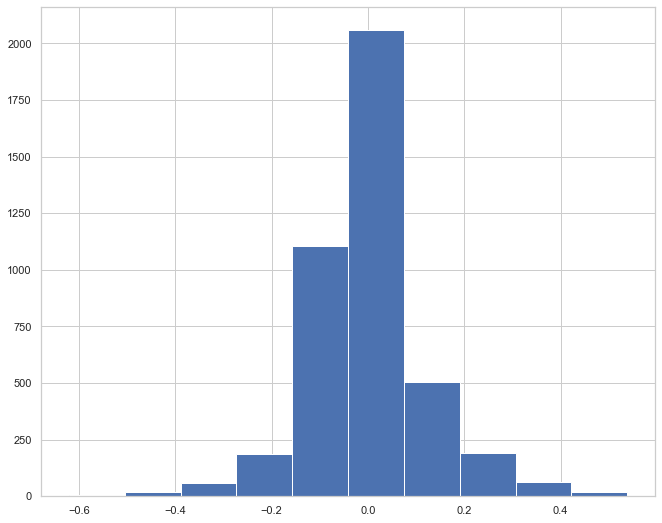

In [125]:
plt.hist(y_pred-y_test) #plot the residuals

In [133]:
valid = pd.DataFrame(data = {'generated power': np.array(y_test).flatten(), 'generated power predicted': y_pred.flatten()})
valid.head() #take a look on the real values and predicted values

,generated power,generated power predicted
0,0.516797,0.327712
1,0.456642,0.442518
2,0.327662,0.187656
3,0.671198,0.626530
4,0.658182,0.618683


In [127]:
scaler_target.inverse_transform(valid['generated power'].values.reshape(-1,1)) 
#we inverse the normalization to take it back to the real values

array([[17.84274],
       [15.79581],
       [11.40692],
       ...,
       [23.81649],
       [22.31768],
       [17.50188]])

In [128]:
valid['generated power'] = scaler_target.inverse_transform(valid['generated power'].values.reshape(-1,1))
valid['generated power predicted'] = scaler_target.inverse_transform(valid['generated power predicted'].values.reshape(-1,1))
#inverse target values. 

<AxesSubplot:>

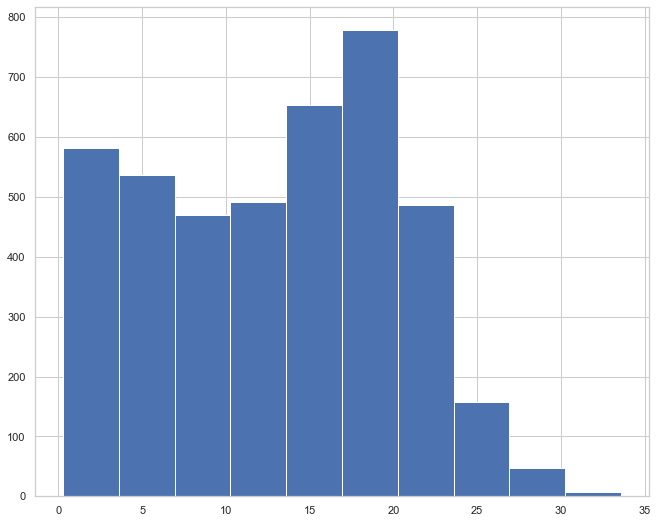

In [129]:
valid['generated power'].hist()

<AxesSubplot:>

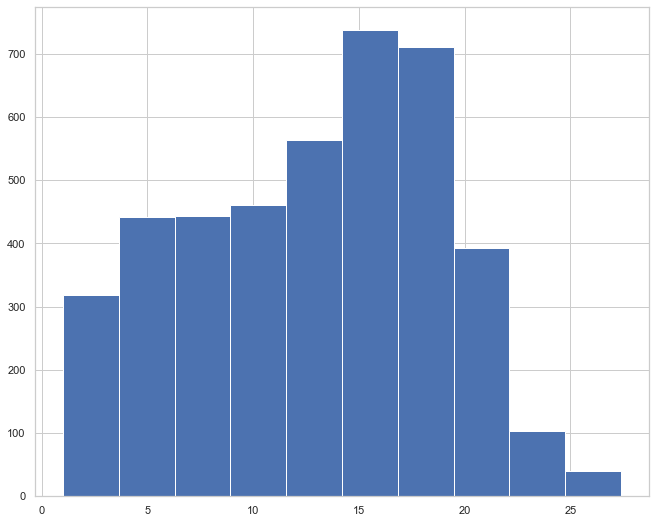

In [130]:
valid['generated power predicted'].hist()

* we are plotting our real target value and prediction value to make a comparaisaion and the values are close so our model will work good.

<AxesSubplot:>

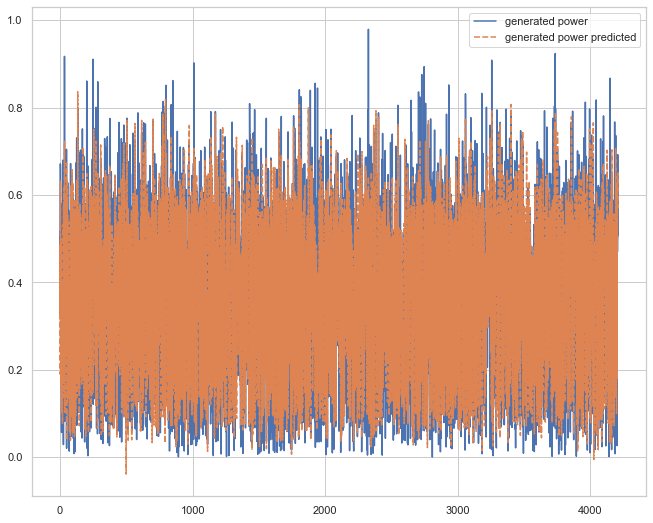

In [98]:
import seaborn as sns
sns.set_theme(style="whitegrid")


sns.lineplot(data=valid, ) #a visualization between real and predicted value

Text(0.5, 26.200000000000003, 'Date')

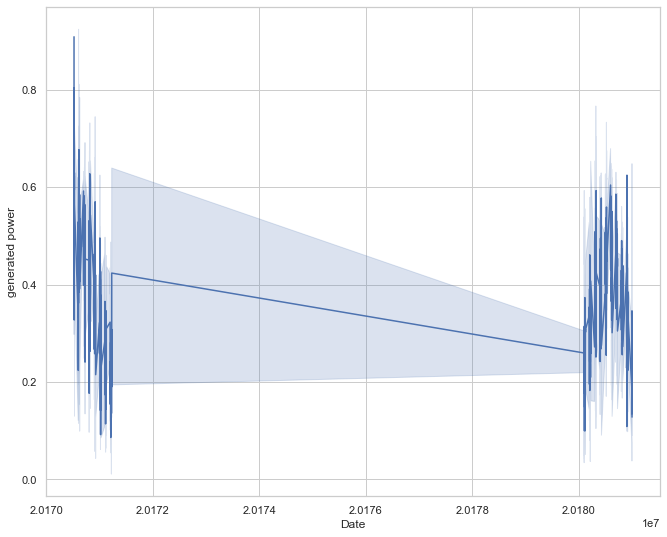

In [155]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=y_test.index, y="generated power", data=valid)
ax.set_title('Power: Actuals vs Predictions for Test Data')
ax.set_ylabel('gGnerated power')
ax.set_xlabel('Date')
# Another visualization to see our model 

Text(0.5, 0, 'Time')

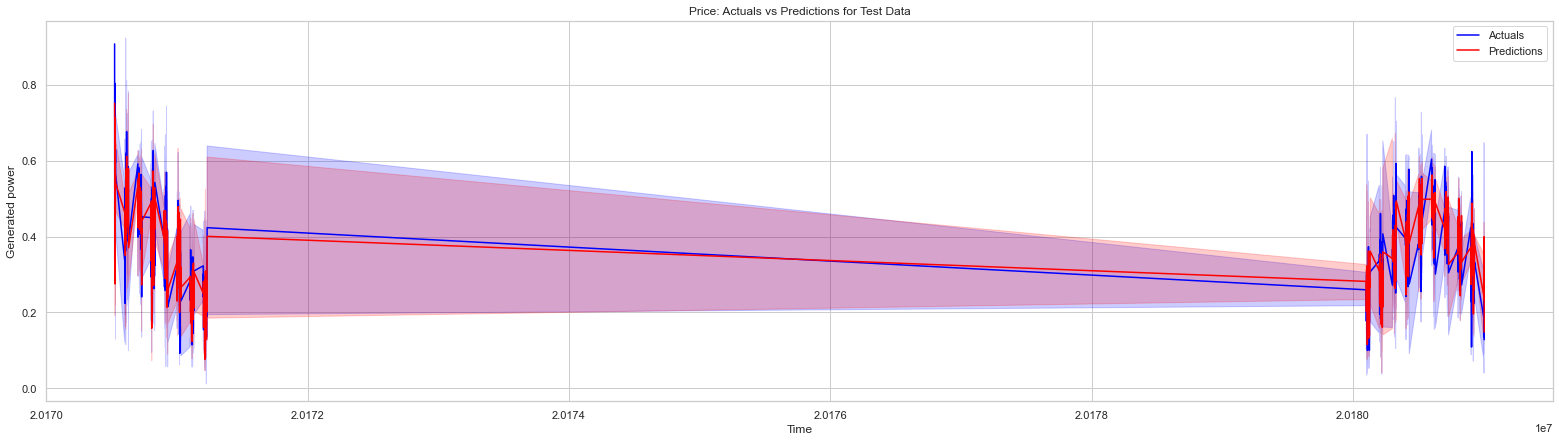

In [156]:
#actual vs predicted price on TEST DATA, our data is daily thats why the plot looks like that. 
fig, ax=plt.subplots(figsize=(27,7))
sns.lineplot(x=y_test.index, y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index, y=y_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions for Test Data')
ax.set_ylabel('Generated power')
ax.set_xlabel('Time')


In [99]:
#making a predective system to try our model. 
input_data = (38.95,-122.57,6.63452,43.22510,10,3.0,802.3,722,5)
arr = numpy.array(input_data)
normal_array = scaler.transform(arr.reshape(1,-1)).reshape(-1)
print(normal_array)

input_data1 = (7.557496e-01,-0.654861,1.224647e-16,-0.809017, 1, 0,0,0, 8)
arr1 = numpy.array(input_data1)
arr2 = numpy.concatenate([normal_array, arr1])
print(arr2)

[0.6781825  0.44373117 0.0663533  0.73736312 0.20408163 0.3
 0.08313156 1.         1.        ]
[ 6.78182501e-01  4.43731167e-01  6.63533017e-02  7.37363121e-01
  2.04081633e-01  3.00000000e-01  8.31315577e-02  1.00000000e+00
  1.00000000e+00  7.55749600e-01 -6.54861000e-01  1.22464700e-16
 -8.09017000e-01  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.00000000e+00]


In [100]:
scaler.transform(arr.reshape(1,-1))

array([[0.6781825 , 0.44373117, 0.0663533 , 0.73736312, 0.20408163,
        0.3       , 0.08313156, 1.        , 1.        ]])

In [154]:
predection = stacked_model.predict((arr2).reshape(1,-1))

In [152]:
real_value= scaler_target.inverse_transform(predection.reshape(-1,1)) 

In [153]:
print("The predicted value is:" , real_value )

The predicted value is: [[7.02771792]]
